## BERT (Bidirectional Encoder Representations from Transformers)
-



#### BERT NLP Application
- Google Search
- Sentiment Analysis
- Language Translation
- Text Summarization
- Question Answering
- Highlighting paragraphs

### Pre-trained bert model
- **BERT-base**: This is the base version of BERT with 12 transformer layers, 768 hidden units, and 12 self-attention heads.

- **BERT-large**: BERT-large is a larger version of BERT with 24 transformer layers, 1024 hidden units, and 16 self-attention heads

- **BERT-cased**: BERT-cased retains the casing information of the original text during pre-training. This can be useful for tasks where capitalization plays a significant role, such as named entity recognition.

- **BERT-uncased**: BERT-uncased converts all text to lowercase during pre-training. It is suitable when the case information is less important for the specific NLP task.





### Reference
http://jalammar.github.io/illustrated-bert/

## Sentiment analysis using BERT

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.2 MB/s eta 0:00:00


In [2]:
import transformers
from transformers import BertModel, BertTokenizer
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import pandas as pd

In [10]:
if torch.cuda.is_available():
    torch.device('cuda')
else:
    torch.device('cpu')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ujjalkumarmaity/NLP/main/bert/reviews.csv',on_bad_lines='skip')
df = df[['content','score']]
def convert_sentiment(x):
    if x<=2:
        return "nagative"
    elif x==3:
        return "neutral"
    else:
        return "positive"
df['sentiment'] = df.score.apply(convert_sentiment)
df.head(5)

,content,score,sentiment
0,I cannot open the app anymore,1,nagative
1,I have been begging for a refund from this app...,1,nagative
2,Very costly for the premium version (approx In...,1,nagative
3,"Used to keep me organized, but all the 2020 UP...",1,nagative
4,Dan Birthday Oct 28,1,nagative


<Axes: >

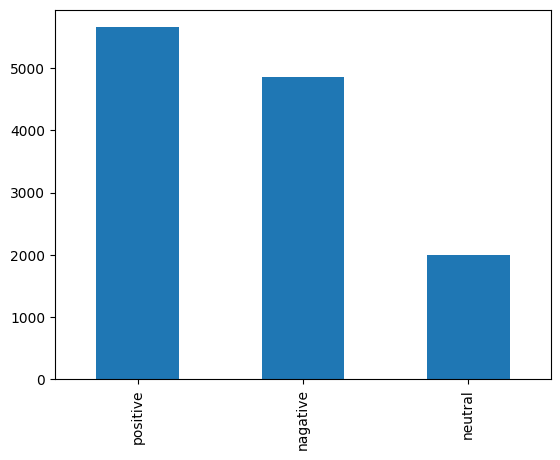

In [4]:
df.sentiment.value_counts().plot(kind='bar')

### Preprocess Data

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [6]:
# Construct a BERT tokenizer
tokenizer('let define the metrics you')

{'input_ids': [101, 1519, 9410, 1103, 12676, 1116, 1128, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [11]:
# Converts a string to a sequence of ids (integer), using the tokenizer and vocabulary.
tokenizer.encode('let define the metrics you')

[101, 1519, 9410, 1103, 12676, 1116, 1128, 102]

In [12]:
tokenizer.encode_plus("let define the metrics you")

{'input_ids': [101, 1519, 9410, 1103, 12676, 1116, 1128, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

### Prepare torch dataset

In [ ]:
def ReviewData(Dataset):
    def __init__(self,tokenizer,review,label,max_len):
        self.tokenizer = tokenizer
        self.review = review
        self.label = label
        self.max_len = max_len
    def __len__(self):
        return len(self.review)
    def __getitem__(self,ind):
        review = self.review[ind]
        label = self.label[ind]
        embed = self.tokenizer.encode_plus()